# Adaboost
For this exercise you will implement AdaBoost from scratch and applied it to a spam dataset. You will be classifying data into spam and not spam. You can call DecisionTreeClassifier from sklearn (with default max_depth=1) to learn your base classifiers.

Here is how you train a decision tree classifier with weights.

`
h = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
h.fit(X, Y, sample_weight=w)
`

### Alan Perry

In [8]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [16]:
# accuracy computation
# this data is not highly imbalance so accuracy is ok
def accuracy(y, pred):
    return np.sum(y == pred) / float(len(y)) 

In [17]:
def parse_spambase_data(filename):
    """ Given a filename return X and Y numpy arrays

    X is of size number of rows x num_features
    Y is an array of size the number of rows
    Y is the last element of each row. (Convert 0 to -1)
    """
    f = open(filename,'r')
    lines = f.readlines()
    num_rows = len(lines)
    num_features = len(lines[0].split(','))
    X = np.loadtxt(open(filename, 'r'), delimiter=",",usecols = range(num_features-1))

    Y = np.zeros(num_rows)
    Y= [int(x.split(',')[-1][0]) for x in lines]
    Y = np.array([1 if _ else -1 for _ in Y])
    f.close()
    return X, Y

In [18]:
y_test = np.array([1., -1., 1., 1., -1., -1., 1., 1., 1., -1.])
X, Y = parse_spambase_data("tiny.spam.train")
for i in range(len(y_test)): assert(y_test[i] == Y[i])
n, m = X.shape
assert(n == 10)
assert(m == 57)

In [19]:
def adaboost(X, y, num_iter, max_depth=1):
    """Given an numpy matrix X, a array y and num_iter return trees and weights 
   
    Input: X, y, num_iter
    Outputs: array of trees from DecisionTreeClassifier
             trees_weights array of floats
    Assumes y is {-1, 1}
    """
    trees = []
    trees_weights = [] 
    N, _ = X.shape
    d = np.ones(N) / N
    
    for tree_index in range(num_iter):
        curr_tree = DecisionTreeClassifier(max_depth=max_depth)
        curr_tree.fit(X=X,y=y, sample_weight=d)
        curr_pred = curr_tree.predict(X)
        print('curr_pred:',tree_index,' ',curr_pred)
        incorrect = np.array(curr_pred != y)

        curr_error = (d[incorrect].sum() / d.sum())
        print('curr_error:',tree_index,' ',curr_error)
        if curr_error < 1e-324:
            curr_error = 1e-324
        curr_alph = np.log((1-curr_error)/curr_error)
        #update weights
        print('curr_alph:',tree_index,' ',curr_alph)

        d = d * np.exp(curr_alph*incorrect)
        print('d:',tree_index,' ',d)

        trees.append(curr_tree)
        trees_weights.append(curr_alph)
    return trees, trees_weights


In [20]:
X, Y = parse_spambase_data("tiny.spam.train")
trees, weights = adaboost(X, Y, 2)
y_hat_0 = trees[0].predict(X)
assert(len(trees) == 2)
assert(len(weights) == 2)
assert(isinstance(trees[0], DecisionTreeClassifier))
assert(np.array_equal(y_hat_0[:5], [1.,-1.,1, 1, -1]))

curr_pred: 0   [ 1 -1  1  1 -1 -1 -1  1  1 -1]
curr_error: 0   0.1
curr_alph: 0   2.1972245773362196
d: 0   [0.1 0.1 0.1 0.1 0.1 0.1 0.9 0.1 0.1 0.1]
curr_pred: 1   [ 1 -1  1  1 -1  1  1  1  1 -1]
curr_error: 1   0.05555555555555555
curr_alph: 1   2.833213344056216
d: 1   [0.1 0.1 0.1 0.1 0.1 1.7 0.9 0.1 0.1 0.1]


In [21]:
y_hat_0 = trees[0].predict(X)
assert(np.array_equal(y_hat_0[:5], [1.,-1.,1, 1, -1]))

In [22]:
def adaboost_predict(X, trees, trees_weights):
    """Given X, trees and weights predict Y
    """
    # X input, y output
    N, _ =  X.shape
    y = np.zeros(N)
    for tree_index in range(len(trees)):
        predictions = trees[tree_index].predict(X)
        y = y + trees_weights[tree_index]*predictions
    y = np.array([-1 if _ < 0 else 1 for _ in y])
    return y


In [23]:
x = np.array([[0, -1], [1, 0], [-1, 0]])
y = np.array([-1, 1, 1])
trees, weights = adaboost(x, y, 1)
pred = adaboost_predict(x, trees, weights)
assert(np.array_equal(pred, y))

curr_pred: 0   [-1  1  1]
curr_error: 0   0.0
curr_alph: 0   inf
d: 0   [nan nan nan]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


In [24]:
X, Y = parse_spambase_data("spambase.train")
X_test, Y_test = parse_spambase_data("spambase.test")
trees, trees_weights = adaboost(X, Y, 10)
Yhat = adaboost_predict(X, trees, trees_weights)
Yhat_test = adaboost_predict(X_test, trees, trees_weights)
    
acc_test = accuracy(Y_test, Yhat_test)
acc_train = accuracy(Y, Yhat)
print("Train Accuracy %.4f" % acc_train)
print("Test Accuracy %.4f" % acc_test)
assert(np.around(acc_train, decimals=4)==0.9111)
assert(np.around(acc_test, decimals=4)==0.9190)

curr_pred: 0   [-1 -1  1 ... -1 -1 -1]
curr_error: 0   0.20944444444444446
curr_alph: 0   1.3282774106418416
d: 0   [0.00104848 0.00027778 0.00027778 ... 0.00027778 0.00027778 0.00027778]
curr_pred: 1   [-1 -1  1 ... -1  1  1]
curr_error: 1   0.24175584514353993
curr_alph: 1   1.1430771253057108
d: 1   [0.00328846 0.00027778 0.00027778 ... 0.00027778 0.00087122 0.00087122]
curr_pred: 2   [ 1 -1  1 ...  1 -1  1]
curr_error: 2   0.28280143319837275
curr_alph: 2   0.930607741508098
d: 2   [0.00328846 0.00027778 0.00027778 ... 0.00070446 0.00087122 0.00220947]
curr_pred: 3   [ 1 -1 -1 ... -1 -1 -1]
curr_error: 3   0.2872535405009939
curr_alph: 3   0.9087605182423808
d: 3   [0.00328846 0.00027778 0.00068923 ... 0.00070446 0.00087122 0.00220947]
curr_pred: 4   [ 1 -1  1 ... -1  1  1]
curr_error: 4   0.3426765342334257
curr_alph: 4   0.6513892815370603
d: 4   [0.00328846 0.00027778 0.00068923 ... 0.00070446 0.00167118 0.00423821]
curr_pred: 5   [ 1  1  1 ...  1  1 -1]
curr_error: 5   0.325929

# Gradient boosting for regression with MSE loss
For this exercise you will implement a version of gradient boosting from scratch and applied it to predict rental prices. You can call DecisionTreeRegressor from sklearn to learn your base classifiers.
 
`tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)`

In [5]:
def load_dataset():
    dataset = np.loadtxt("rent-ideal.csv", delimiter=",", skiprows=1)
    y = dataset[:, -1]
    X = dataset[:, 0:- 1]
    return X, y

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


def gradient_boosting_mse(X, y, num_iter, max_depth=1, nu=0.1):
    """Given X, a array y and num_iter return y_mean and trees 
   
    Input: X, y, num_iter
           max_depth
           nu (is the shinkage)
    Outputs:y_mean, array of trees from DecisionTreeRegression
    """
    
    trees = []
    N, _ = X.shape
    y_mean = np.mean(y)
    
    f_m = np.resize(y_mean,(N))

    for tree_num in range(num_iter):
        #current residuals
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
       
        current_residuals = y - f_m

        tree.fit(X,current_residuals)
        
        f_m = f_m + nu * tree.predict(X)
        
        trees.append(tree)
    return y_mean, trees   

In [9]:
def gradient_boosting_predict(X, trees, y_mean,  nu=0.1):
    """Given X, trees, y_mean predict y_hat
    """
    
    N, _ =  X.shape
    curr_pred = np.resize(y_mean,(N))

    for tree_index in range(len(trees)):
        curr_pred = curr_pred + nu * trees[tree_index].predict(X)
    return curr_pred
X, y = load_dataset()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=3)


In [10]:
X, y = load_dataset()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=3)

y_mean, trees = gradient_boosting_mse(X_train, y_train, 300, max_depth=7, nu=0.1)
assert(np.around(y_mean, decimals=4)==3434.7185)
y_hat_train = gradient_boosting_predict(X_train, trees, y_mean, nu=0.1)
assert(np.around(r2_score(y_train, y_hat_train), decimals=4)== 0.8993) 

In [11]:
y_hat = gradient_boosting_predict(X_val, trees, y_mean, nu=0.1)
assert(np.around(r2_score(y_val, y_hat), decimals=4)== 0.8399)

In [12]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
X, y = load_dataset()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=3)



In [13]:
val_error = []
train_error = []
x = range(100,3000,100)
for number_trees in range(100,3000,100):
    print(number_trees)
    y_mean, trees = gradient_boosting_mse(X_train, y_train, number_trees, max_depth=7, nu=0.1)
    y_hat = gradient_boosting_predict(X_train, trees, y_mean, nu=0.1)
    train_error.append(r2_score(y_train, y_hat))    
    y_hat = gradient_boosting_predict(X_val, trees, y_mean, nu=0.1)
    val_error.append(r2_score(y_val, y_hat))

    

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


The best number of trees.

In [18]:
print(100*np.argmax(val_error))

1900


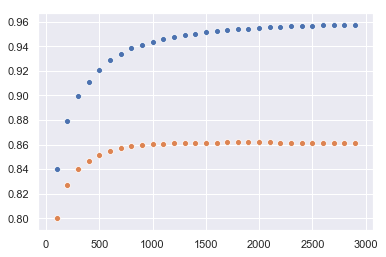

In [32]:
ax = sns.scatterplot(x=x, y=train_error)
ax = sns.scatterplot(x=x, y=val_error)

In [ ]:
import xgboost
xgb_pars = {'min_child_weight': 50, 
            'eta': 0.1, 
            'colsample_bytree': 1, 
            'max_depth': 7,
            'subsample': 0.8, 
            'lambda': .1, 
            'nthread': -1, 
            'booster' : 'gblinear', 
            'verbosity': 0,
            'eval_metric': 'rmse', 
            'objective': 'reg:linear'}

In [37]:
xgb_val_error = []
xgb_train_error = []
dtrain = xgboost.DMatrix(X_train, label=y_train)
dvalid = xgboost.DMatrix(X_val, label=y_val)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

x = range(100,3000,100)
for number_trees in range(100,3000,100):
    gbm = xgboost.train(xgb_pars, dtrain, number_trees, watchlist,
                    maximize=False, verbose_eval=0)
    y_hat = gbm.predict(dtrain)
    xgb_train_error.append(r2_score(y_train, y_hat))    
    y_hat = gbm.predict(dvalid)
    xgb_val_error.append(r2_score(y_val, y_hat))


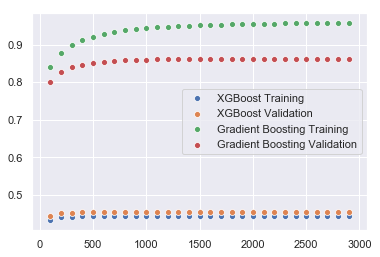

In [40]:
ax = sns.scatterplot(x=x, y=xgb_train_error, label="XGBoost Training")
ax = sns.scatterplot(x=x, y=xgb_val_error, label="XGBoost Validation")
ax = sns.scatterplot(x=x, y=train_error, label="Gradient Boosting Training")
ax = sns.scatterplot(x=x, y=val_error, label="Gradient Boosting Validation")